### do it pandas - 12. 시계열 데이터

#### 실습3. 테슬라 주식 데이터로 시간 계산하기 (255p~)

In [1]:
!pip install pandas-datareader

In [8]:
import pandas as pd

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

#tesla에는 데이터프레임이 저장됩니다.
tesla = pdr.get_data_quandl('TSLA',api_key='Ws4sCw2HY8m67vqDrMpd')

#tesla에는 저장된 데이터프레임을 파일로 저장합니다.
tesla.to_csv('./data/tesla_stock_quandl.csv')
print(tesla.head())

              Open    High     Low   Close      Volume  ExDividend  \
Date                                                                 
2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                                    
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0  
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0  
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0  
2018-03-22         1.0   313.89   318.82  308.18    309.10   4914307.0  
2018-03-21         1.0   310.25   322.44  310.19    316.53   5927881.0 

In [9]:
tesla = pd.read_csv('./data/tesla_stock_quandl.csv', parse_dates=[0]) 
#parse_dates(): datetime 형태로 변환할지 여부 

print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        367 non-null    datetime64[ns]
 1   Open        367 non-null    float64       
 2   High        367 non-null    float64       
 3   Low         367 non-null    float64       
 4   Close       367 non-null    float64       
 5   Volume      367 non-null    float64       
 6   ExDividend  367 non-null    float64       
 7   SplitRatio  367 non-null    float64       
 8   AdjOpen     367 non-null    float64       
 9   AdjHigh     367 non-null    float64       
 10  AdjLow      367 non-null    float64       
 11  AdjClose    367 non-null    float64       
 12  AdjVolume   367 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 37.4 KB
None


In [19]:
print(tesla.loc[(tesla.Date.dt.year == 2016) & (tesla.Date.dt.month == 10)])
# 자료가 최신화 되어서 2010, 10 데이터는 없다.
# 대신 2016, 10으로 바꾸어서 진행했다.

                 Date    Open      High     Low   Close      Volume  \
Date                                                                  
2016-10-31 2016-10-31  202.49  202.4900  195.81  197.73   4692273.0   
2016-10-28 2016-10-28  204.00  205.3200  199.83  199.97   4280141.0   
2016-10-27 2016-10-27  211.34  213.7000  201.65  204.01  13093744.0   
2016-10-26 2016-10-26  201.00  203.1900  200.10  202.24   5632841.0   
2016-10-25 2016-10-25  202.90  204.6900  201.20  202.34   2445014.0   
2016-10-24 2016-10-24  201.00  203.9452  200.25  202.76   2751562.0   
2016-10-21 2016-10-21  198.60  201.5700  197.41  200.09   2943402.0   
2016-10-20 2016-10-20  202.12  203.0000  197.05  199.10   5072877.0   
2016-10-19 2016-10-19  199.74  206.6600  198.06  203.56   6991183.0   
2016-10-18 2016-10-18  195.99  199.4700  193.26  199.10   5680475.0   
2016-10-17 2016-10-17  197.05  198.3900  192.00  193.96   4554080.0   
2016-10-14 2016-10-14  200.66  201.4300  196.30  196.51   4269850.0   
2016-1

In [13]:
# datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2016-10-21', '2016-10-20', '2016-10-19', '2016-10-18',
               '2016-10-17', '2016-10-14', '2016-10-13', '2016-10-12',
               '2016-10-11', '2016-10-10'],
              dtype='datetime64[ns]', name='Date', length=367, freq=None)


In [23]:
print(tesla['2016'].iloc[:5,:5])
# 2015년 자료가 없어서 2016으로 대신

                 Date    Open    High       Low   Close
Date                                                   
2016-12-30 2016-12-30  216.30  217.50  211.6800  213.69
2016-12-29 2016-12-29  218.56  219.20  214.1225  214.68
2016-12-28 2016-12-28  221.53  223.80  217.2000  219.74
2016-12-27 2016-12-27  214.88  222.25  214.4200  219.53
2016-12-23 2016-12-23  208.00  213.45  207.7100  213.34


<ipython-input-23-b64c76cb4795>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2016'].iloc[:5,:5])


In [25]:
print(tesla['2017-06'].iloc[:,:5])
# 2010-06 자료가 없어서 2017-06으로 바꿈

                 Date     Open      High       Low   Close
Date                                                      
2017-06-30 2017-06-30  363.710  366.7674  359.6187  361.61
2017-06-29 2017-06-29  370.610  371.0000  354.1000  360.75
2017-06-28 2017-06-28  366.680  371.7400  362.5200  371.24
2017-06-27 2017-06-27  376.400  376.4000  362.0200  362.37
2017-06-26 2017-06-26  386.690  386.9500  373.1000  377.49
2017-06-23 2017-06-23  382.450  386.9900  379.3450  383.45
2017-06-22 2017-06-22  377.990  385.0000  373.5700  382.61
2017-06-21 2017-06-21  374.350  376.9900  368.0200  376.40
2017-06-20 2017-06-20  376.670  378.8800  369.7300  372.24
2017-06-19 2017-06-19  375.000  376.7000  367.8000  369.80
2017-06-16 2017-06-16  377.975  378.0100  370.1000  371.40
2017-06-15 2017-06-15  372.500  375.4600  366.4900  375.34
2017-06-14 2017-06-14  381.085  384.2500  376.3100  380.66
2017-06-13 2017-06-13  367.620  376.0000  366.6100  375.95
2017-06-12 2017-06-12  357.990  364.5000  350.6200  359.

<ipython-input-25-e774c7cedfe2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2017-06'].iloc[:,:5])


In [26]:
# 시간 간격을 인덱스로 지정해 데이터 추출하기

tesla['ref_date'] = tesla['Date'] - tesla['Date'].min() # Date열의 최솟값을 빼서 ref_date에 추가
print(tesla.head())


                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [27]:
tesla.index = tesla['ref_date'] # 시간간격(ref_date)
print(tesla.iloc[:5,:5])

               Date    Open    High     Low   Close
ref_date                                           
533 days 2018-03-27  304.00  304.27  277.18  279.18
532 days 2018-03-26  307.34  307.59  291.36  304.18
529 days 2018-03-23  311.25  311.61  300.45  301.54
528 days 2018-03-22  313.89  318.82  308.18  309.10
527 days 2018-03-21  310.25  322.44  310.19  316.53


In [29]:
print(tesla['5 days':].iloc[:5,:5]) # 데이터 수집 이후 최초 5일의 데이터

               Date    Open     High     Low   Close
ref_date                                            
4 days   2016-10-14  200.66  201.430  196.30  196.51
3 days   2016-10-13  200.50  200.895  197.05  200.24
2 days   2016-10-12  200.95  203.880  200.42  201.51
1 days   2016-10-11  201.85  202.200  198.31  200.10
0 days   2016-10-10  201.35  204.140  199.66  200.95


In [32]:
# 시간 범위 생성해 인덱스로 지정하기
# 특정 일에 투락된 데이터도 포함시켜 데이터를 살펴볼 수 있다.

ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5,:5])
# 가장 앞쪽의 데이터 살펴보기 
# 2014년 1월 1일의 데이터 누락

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [34]:
print(ebola.iloc[-5:,:5])
# 2014년 3월 23일 데이터 누락

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [35]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
# 2014.12.31 ~ 2015.01.05 사이의 시간 인덱스(DatetimeIndex) 생성
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [36]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date'] # Date열을 인덱스로 지정 (없으면 오류 발생)
ebola_5.reindex(head_range) # head_range(시간 범위)를 인덱스로 지정
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [37]:
print(pd.date_range('2017-01-01','2017-01-07', freq='B')) #freq = 'B' 는 평일만 포함
# 2017-01-07은 빠짐 (평일이 아님)

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


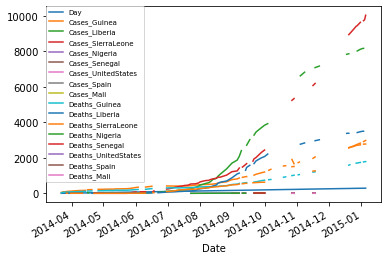

In [38]:
# 시간 범위 수정하고 데이터 밀어내기 - shift 메서드

import matplotlib.pyplot as plt

ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [39]:
ebola_sub = ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [60]:
ebola = pd.read_csv('./data/country_timeseries.csv',parse_dates=['Date'])
# Date 열의 자료형을 datetime 오브젝트로 변환
# '../' : 부모 디렉터리 , './' : 현재 디렉터리
print(ebola.head().iloc[:,:5])
print('\n')
print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [61]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
print(new_idx)
# ebola 데이터 프레임의 Date 열의 최댓값과 최솟값으로 시간범위 생성해서 인덱스에 저장
# 날짜가 아예 없었던 데이터의 인덱스 생성 가능 
# new_idx 는 ebola 데이터 집합에 있는 시간 순서 반대로 생성됨

new_idx = reversed(new_idx) # 인덱스 반대로 뒤집기 

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [62]:
ebola = ebola.reindex(new_idx) # new_idx를 새로운 인덱스로 지정
print(ebola.head().iloc[:,:5]) 
# 2015년 01월 01일 데이터와 같이 데이터프레임에 없던 날짜 추가됨
# 시간에 대한 누락값은 NaT
print('\n')
print(ebola.tail().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-2

In [63]:
last_valid = ebola.apply(pd.Series.last_valid_index) 
# last_valid_index 는 가장 오래된 데이터를 가져옵니다. (유효한 값이 있는 첫 번째 인덱스 반환)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [64]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [66]:
earliest_date = ebola.index.min() # 가장 처음 발병한 날
print(earliest_date)

shift_values = last_valid - earliest_date
# 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기는 과정
# 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values) 옮긴다
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [70]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d) # shift() : 인자값만큼 데이터를 밀어내는 함수
    ebola_dict[col] = shifted

ebola_shift = pd.DataFrame(ebola_dict) # ebola_dict의 값을 데이터프레임으로

In [71]:
print(ebola_shift.tail()) 
# 최초 발병일 (2014-03-22) 기준으로 모든 열의 데이터 옮김

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [72]:
ebola_shift.index = ebola_shift['Day'] # Day열을 인덱스로 지정
ebola_shift = ebola_shift.drop(['Date','Day'],axis=1) # 그래프에 필요 없는 열 삭제
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

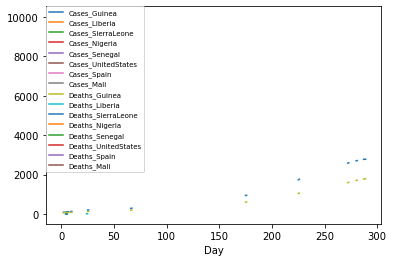

In [74]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()